In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from IPython.display import HTML
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing dataset
bos = load_boston()

In [3]:
x = pd.DataFrame(bos.data,columns=bos.feature_names)
y = pd.DataFrame(bos.target)

In [4]:
x.shape

(506, 13)

In [5]:
# First 5 instances
df1 = x.head()
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Converting df1 to Table for Notion
html = df1.to_html()
  
# write html to file
text_file = open("index1.html", "w")
text_file.write(html)
text_file.close()

In [7]:
# Checking for data types
x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
# Checking for null values
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
# Dataset statistics
df = x.describe()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
# Converting df to Table for Notion
html = df.to_html()
  
# write html to file
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()

In [11]:
# Correlation of features
corr = x.corr()

In [12]:
corr.shape

(13, 13)

(13.0, 0.0)

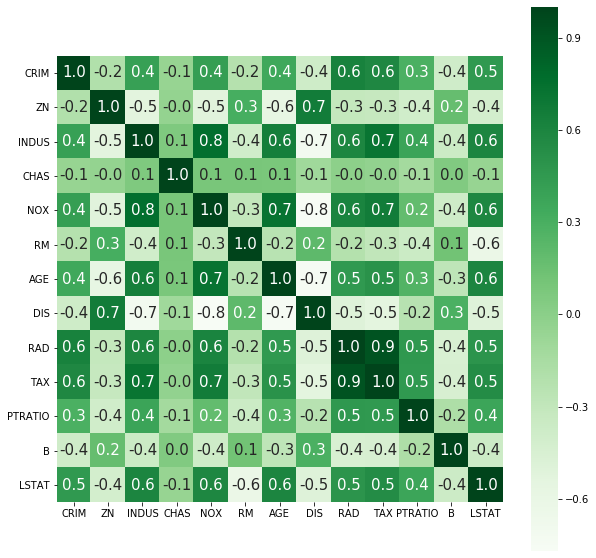

In [13]:
# Heatmap for correlation between features
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [14]:
# Creating training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [15]:
# Applying Linear regression
lr = LinearRegression()

In [16]:
# Training our model
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Predicting on training data
pred1 = lr.predict(xtrain)

In [18]:
# Scores for prediction of training data
print('R^2:',metrics.r2_score(ytrain, pred1))
print('MAE:',metrics.mean_absolute_error(ytrain, pred1))
print('MSE:',metrics.mean_squared_error(ytrain, pred1))

R^2: 0.7611598772034454
MAE: 3.08483418349671
MSE: 19.068341850927226


In [19]:
# Predicting on test data
pred2 = lr.predict(xtest)

In [20]:
# Scores for prediction of test data
print('R^2:',metrics.r2_score(ytest, pred2))
print('MAE:',metrics.mean_absolute_error(ytest, pred2))
print('MSE:',metrics.mean_squared_error(ytest, pred2))

R^2: 0.67716969998517
MAE: 3.557668475650032
MSE: 30.69703770408852


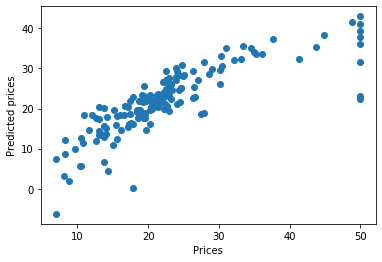

In [21]:
# Plotting Predicted prices vs prices
plt.scatter(ytest,pred2)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

In [22]:
# Applying Polynomial Regression
poly = PolynomialFeatures(degree=2)

In [23]:
# Converting to polynomial form
poly_train = poly.fit_transform(xtrain)
poly_test = poly.fit_transform(xtest)

In [24]:
poly_train.shape

(354, 105)

In [25]:
lg2 = LinearRegression()

In [26]:
# Training the model
lg2.fit(poly_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Predicting on training and test data
pred3 = lg2.predict(poly_train)
pred4 = lg2.predict(poly_test)

In [28]:
# Scores for prediction of training data
print('R^2:',metrics.r2_score(ytrain, pred3))
print('MAE:',metrics.mean_absolute_error(ytrain, pred3))
print('MSE:',metrics.mean_squared_error(ytrain, pred3))

R^2: 0.9332471683804475
MAE: 1.6316184706183006
MSE: 5.329363416561484


In [29]:
# Scores for prediction of test data
print('R^2:',metrics.r2_score(ytest, pred4))
print('MAE:',metrics.mean_absolute_error(ytest, pred4))
print('MSE:',metrics.mean_squared_error(ytest, pred4))

R^2: 0.8093536759032158
MAE: 2.865472201387636
MSE: 18.128030109552988


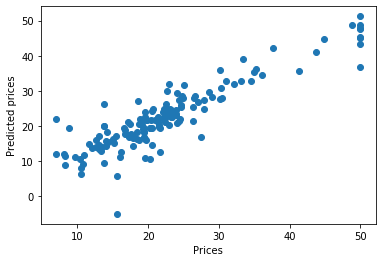

In [30]:
plt.scatter(ytest,pred4)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

In [31]:
# To apply SVR,we scale our data
ss = StandardScaler()
sc_train = ss.fit_transform(xtrain)
sc_test = ss.fit_transform(xtest)

In [32]:
# Creating object of SVR function
reg = svm.SVR()

In [33]:
# Training the model
reg.fit(sc_train,ytrain.values.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# Predicting for training data
pred5 = reg.predict(sc_train)

In [35]:
print('R^2:',metrics.r2_score(ytrain, pred5))
print('MAE:',metrics.mean_absolute_error(ytrain, pred5))
print('MSE:',metrics.mean_squared_error(ytrain, pred5))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, pred5)))

R^2: 0.7013599130727588
MAE: 2.8270631752981004
MSE: 23.842607352743343
RMSE: 4.882889242317845


In [36]:
# Predicting on test data
pred6 = reg.predict(sc_test)

In [37]:
print('R^2:',metrics.r2_score(ytest, pred6))
print('MAE:',metrics.mean_absolute_error(ytest, pred6))
print('MSE:',metrics.mean_squared_error(ytest, pred6))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, pred6)))

R^2: 0.5456601478824501
MAE: 3.7650039852469197
MSE: 43.201916208861874
RMSE: 6.57281645939257


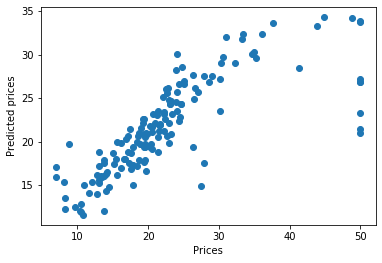

In [38]:
plt.scatter(ytest,pred6)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

In [39]:
# Applying Random Forest
rf = RandomForestRegressor()

In [41]:
# Training the model
rf.fit(xtrain,ytrain.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
# Prediction on training data
pred7 = rf.predict(xtrain)

In [43]:
# Model Evaluation on training data
print('R^2:',metrics.r2_score(ytrain, pred7))
print('MAE:',metrics.mean_absolute_error(ytrain, pred7))
print('MSE:',metrics.mean_squared_error(ytrain, pred7))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, pred7)))

R^2: 0.9613284457310082
MAE: 1.0301694915254238
MSE: 3.087431073446328
RMSE: 1.7571087255620603


In [44]:
# Prediction on test data
pred8 = rf.predict(xtest)

In [45]:
# Model Evaluation on test data
print('R^2:',metrics.r2_score(ytest, pred8))
print('MAE:',metrics.mean_absolute_error(ytest, pred8))
print('MSE:',metrics.mean_squared_error(ytest, pred8))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, pred8)))

R^2: 0.8402198284126672
MAE: 2.6163815789473683
MSE: 15.193053289473683
RMSE: 3.897826739283531


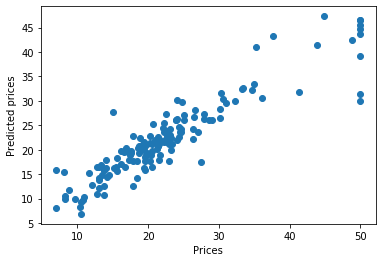

In [46]:
plt.scatter(ytest,pred8)
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

In [50]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Random Forest'],
    'R-squared Score': [metrics.r2_score(ytest, pred2)*100, metrics.r2_score(ytest, pred4)*100 , metrics.r2_score(ytest, pred6)*100, metrics.r2_score(ytest, pred8)*100]})
models

,Model,R-squared Score
0,Linear Regression,67.716970
1,Polynomial Regression,80.935368
2,Support Vector Regression,54.566015
3,Random Forest,84.021983


In [52]:
# Converting df to Table for Notion
html = models.to_html()
  
# write html to file
text_file = open("index2.html", "w")
text_file.write(html)
text_file.close()

Hence we can conclude that Random Forest works best for this dataset